# Miniproject Kevin Jetten

First of all I will import the data and clean it as far as it's needed.

In [2]:
import pandas as pd

dataset_location = "..\ML\Miniproject\dataset_diabetes\diabetic_data.csv"
data = pd.read_csv(dataset_location)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

I will now make some plots about the data. The plots will be used to determine which machine learning algorithm will be used. There are too many features to all put the in one decent scatter plot, this is why I will filter the data and make multiple plots.  
Not every record has certain attributes, like weight, I will first determine the importance of these. This was I can make thought out decisions about the cleaning and usage of the data

In [52]:
common_info_frame = pd.DataFrame({'age': data['age'], 'gender': data['gender'], 'weight': data['weight'],
                                  'time_in_hospital': data['time_in_hospital']})
# I also remove the '20' records, there are only three and I expect they should be 200+ but I cant be certain.
common_info_frame = common_info_frame[~common_info_frame.weight.isin(["?", "20"])]

common_info_frame['age'] = common_info_frame['age'].apply(lambda x: x[1:-1])
common_info_frame['weight'] = common_info_frame['weight'].apply(lambda x: x[1:-1])
common_info_frame.head(0)


,age,gender,time_in_hospital,weight


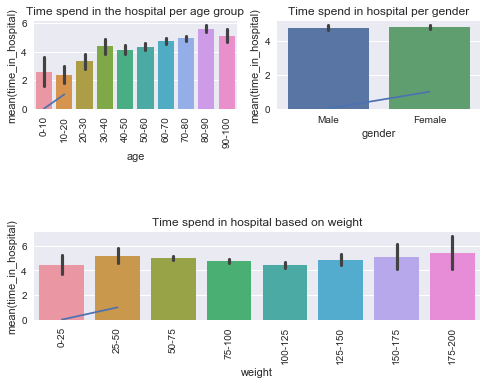

In [55]:
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

'''''
ax1= plt.subplot(3,2,1)
ax2= plt.subplot(3,2,2)
ax3= plt.subplot(3,2,3)
'''''
# Create 2x2 sub plots
gs = gridspec.GridSpec(3, 2)

pl.figure()
ax1 = pl.subplot(gs[0, 0])  # row 0, col 0
pl.plot([0, 1])

ax2 = pl.subplot(gs[0, 1])  # row 0, col 1
pl.plot([0, 1])

ax3 = pl.subplot(gs[2, :])  # row 1, span all columns
pl.plot([0, 1])

# First plot (from left to right) is about the average time spend in the hospital grouped by their age group.
sns.barplot('age',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax1,
            order=["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100"]
            )
ax1.set_title('Time spend in the hospital per age group')
for label in ax1.get_xticklabels():
    label.set_rotation(90)

# The second plot is about the average time spend in the hospital grouped by gender.
sns.barplot('gender',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax2,
            )
ax2.set_title('Time spend in hospital per gender')

# The third plot is about the average time spend in the hospital grouped by how much the patient weighs.
sns.barplot('weight',  # Horizontal axis
            'time_in_hospital',  # Vertical axis
            data=common_info_frame,  # Data source
            ax=ax3,
            order=["0-25", "25-50", "50-75", "75-100", "100-125", "125-150", "150-175", "175-200"]
            )
ax3.set_title('Time spend in hospital based on weight')
for label in ax3.get_xticklabels():
    label.set_rotation(90)

plt.show()


Machine learning 

Accuracy